<a href="https://colab.research.google.com/github/kapilkn/ML/blob/master/COVID19_Forecasting_by_Kapil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COVID 19 Prediction India 
**Kapil Nagwanshi**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px # Word map
import pandas.util.testing as tm

In [0]:
path = 'https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_19_clean_complete.csv'
df = pd.read_csv(path)
df.head().style.background_gradient(cmap='Reds')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,nan,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,nan,Albania,41.153300,20.168300,1/22/20,0,0,0
2,nan,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,nan,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,nan,Angola,-11.202700,17.873900,1/22/20,0,0,0


In [0]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
24885,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/25/20,1,0,0
24886,NaN,South Sudan,6.877000,31.307000,4/25/20,5,0,0
24887,NaN,Western Sahara,24.215500,-12.885800,4/25/20,6,0,5
24888,NaN,Sao Tome and Principe,0.186360,6.613081,4/25/20,4,0,0
24889,NaN,Yemen,15.552727,48.516388,4/25/20,1,0,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24890 entries, 0 to 24889
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  7600 non-null   object 
 1   Country/Region  24890 non-null  object 
 2   Lat             24890 non-null  float64
 3   Long            24890 non-null  float64
 4   Date            24890 non-null  object 
 5   Confirmed       24890 non-null  int64  
 6   Deaths          24890 non-null  int64  
 7   Recovered       24890 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.5+ MB


In [0]:
# We need to convert date into date time format
#state is not required for analysis her
df = pd.read_csv(path,parse_dates=['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


## **Time Series Data**

In [0]:
df.drop(['Province/State'],axis=1,inplace=True)

In [0]:
df.rename(columns={"Country/Region" : "Country"},inplace=True)
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [0]:
active = df['Confirmed']-df['Deaths']-df['Recovered']
df['Active'] =active

In [0]:
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


In [0]:
top = df[df['Date']== df['Date'].max()]

In [0]:
df.rename(columns={"Actve" : "Active"},inplace=True)
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


Top Countries

In [0]:
df['Date'].max()

Timestamp('2020-04-25 00:00:00')

In [0]:
top.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
24628,Afghanistan,33.0000,65.0000,2020-04-25,1463,47,188,1228
24629,Albania,41.1533,20.1683,2020-04-25,712,27,403,282
24630,Algeria,28.0339,1.6596,2020-04-25,3256,419,1479,1358
24631,Andorra,42.5063,1.5218,2020-04-25,738,40,344,354
24632,Angola,-11.2027,17.8739,2020-04-25,25,2,6,17


In [0]:
world =top.groupby('Country')['Confirmed',	'Deaths',	'Recovered'	,'Active'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [0]:
world.head()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1463,47,188,1228
1,Albania,712,27,403,282
2,Algeria,3256,419,1479,1358
3,Andorra,738,40,344,354
4,Angola,25,2,6,17


### Plotting on world map-Active Cases

In [0]:
#### Plotting On World Map (Active Cases)
figure = px.choropleth(world,locations='Country',locationmode='country names',color='Active',
                       hover_name='Country',range_color=[1,10000],color_continuous_scale='picnic',
                       title='Countries With Active Cases')
figure.show()

## Wordwide active cases over time

In [0]:
total_active_cases = df.groupby('Date')['Date','Active'].sum().reset_index()
total_active_cases.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Active
90,2020-04-21,1709415
91,2020-04-22,1749596
92,2020-04-23,1798439
93,2020-04-24,1844141
94,2020-04-25,1898917


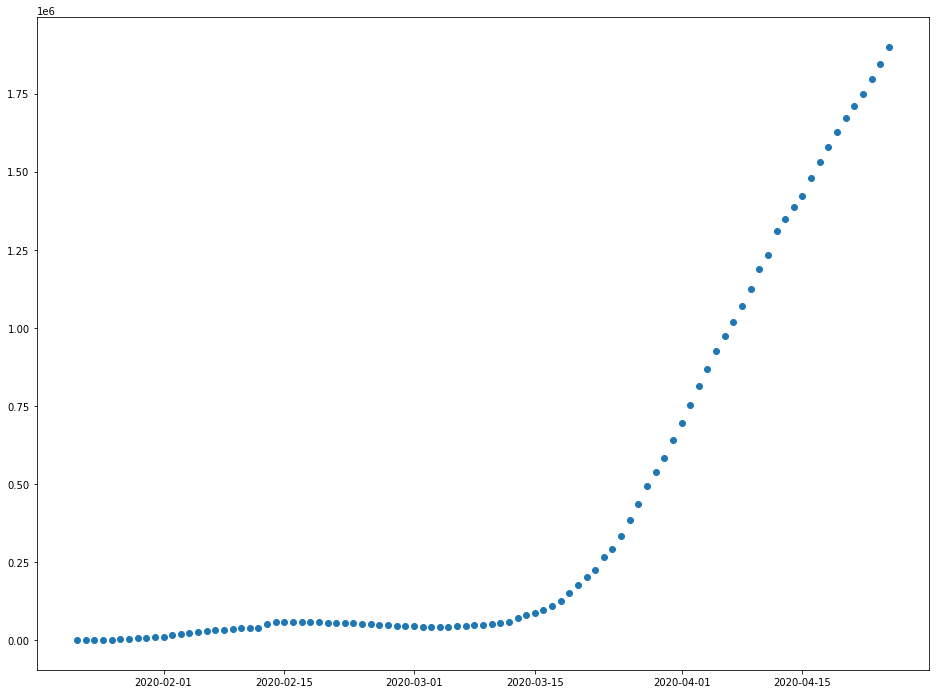

In [0]:
plt.figure(figsize=(16,12))
plt.scatter(total_active_cases.Date,total_active_cases.Active)
plt.show()

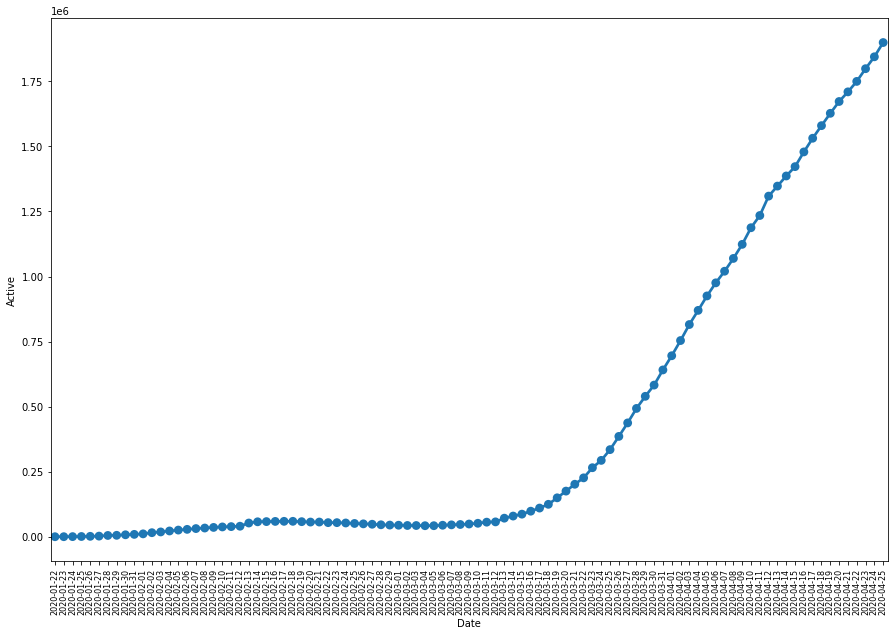

In [0]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=8)
sns.pointplot(total_active_cases['Date'].dt.date,total_active_cases['Active'])
plt.show()

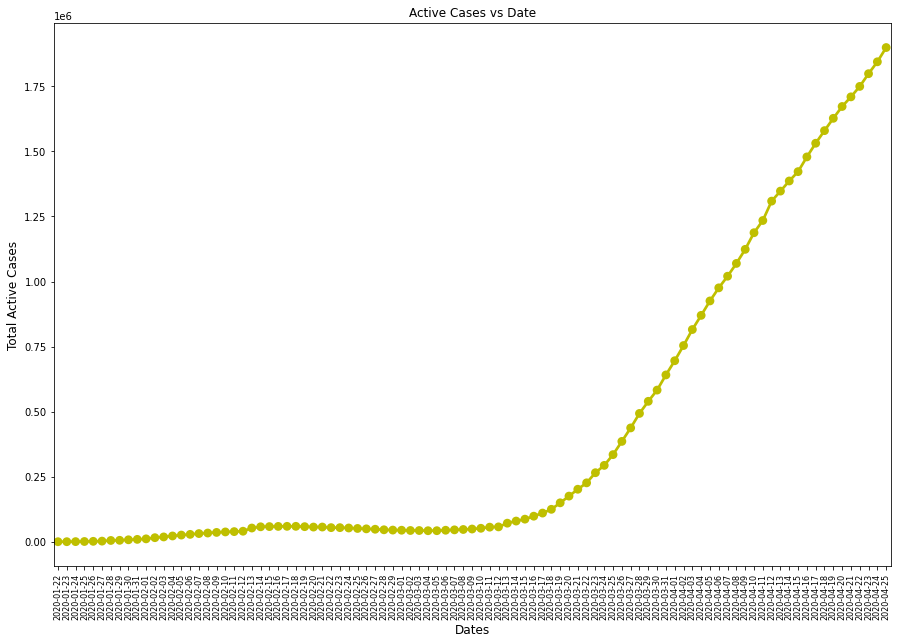

In [0]:
plt.figure(figsize=(15,10))
plt.title("Active Cases vs Date")
plt.xticks(rotation=90,fontsize=8)
sns.pointplot(total_active_cases['Date'].dt.date,total_active_cases['Active'],color='y')
plt.xlabel("Dates",fontsize=12)
plt.ylabel("Total Active Cases",fontsize=12)
plt.show()

### Top 20 countries having confirmed cases

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



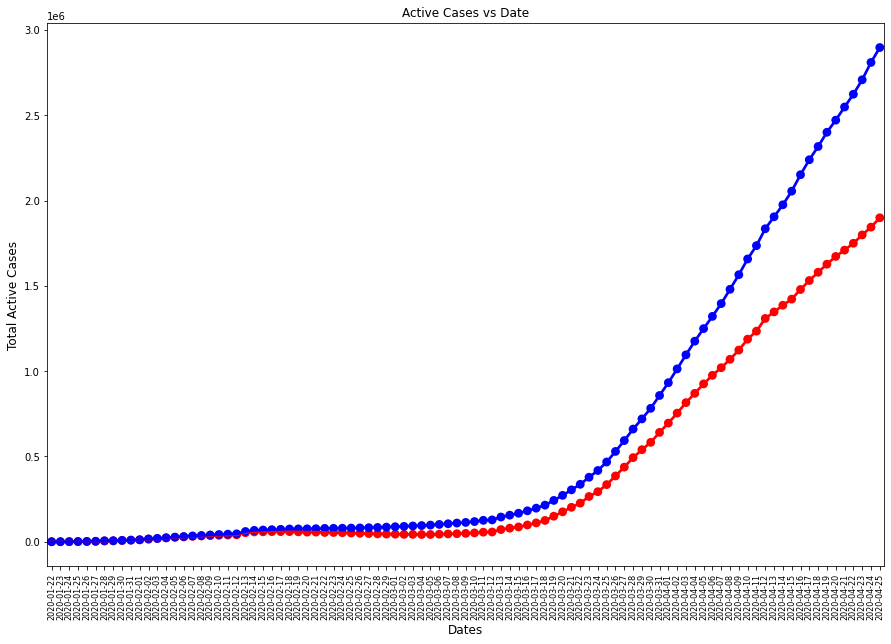

In [0]:
total_confirmed_cases = df.groupby('Date')['Date','Confirmed'].sum().reset_index()
plt.figure(figsize=(15,10))
plt.title("Active Cases vs Date")
plt.xticks(rotation=90,fontsize=8)
sns.pointplot(total_active_cases['Date'].dt.date,total_active_cases['Active'],color='red')
sns.pointplot(total_confirmed_cases['Date'].dt.date,total_confirmed_cases['Confirmed'],color='blue')
plt.xlabel("Dates",fontsize=12)
plt.ylabel("Total Active Cases",fontsize=12)
plt.show()

In [0]:
#### Top 20 Countries Having Confirmed Cases
top.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
24628,Afghanistan,33.0000,65.0000,2020-04-25,1463,47,188,1228
24629,Albania,41.1533,20.1683,2020-04-25,712,27,403,282
24630,Algeria,28.0339,1.6596,2020-04-25,3256,419,1479,1358
24631,Andorra,42.5063,1.5218,2020-04-25,738,40,344,354
24632,Angola,-11.2027,17.8739,2020-04-25,25,2,6,17


In [0]:
top_confirmed = top.groupby('Country')['Confirmed'].sum().sort_values(ascending=False).reset_index()
top_confirmed.head()  ### gropu the data by country and sort acc. to confirmed

,Country,Confirmed
0,US,938154
1,Spain,223759
2,Italy,195351
3,France,161644
4,Germany,156513


In [0]:
top_20 = top_confirmed.head(20)
top_20

,Country,Confirmed
0,US,938154
1,Spain,223759
2,Italy,195351
3,France,161644
4,Germany,156513
5,United Kingdom,149569
6,Turkey,107773
7,Iran,89328
8,China,83909
9,Russia,74588


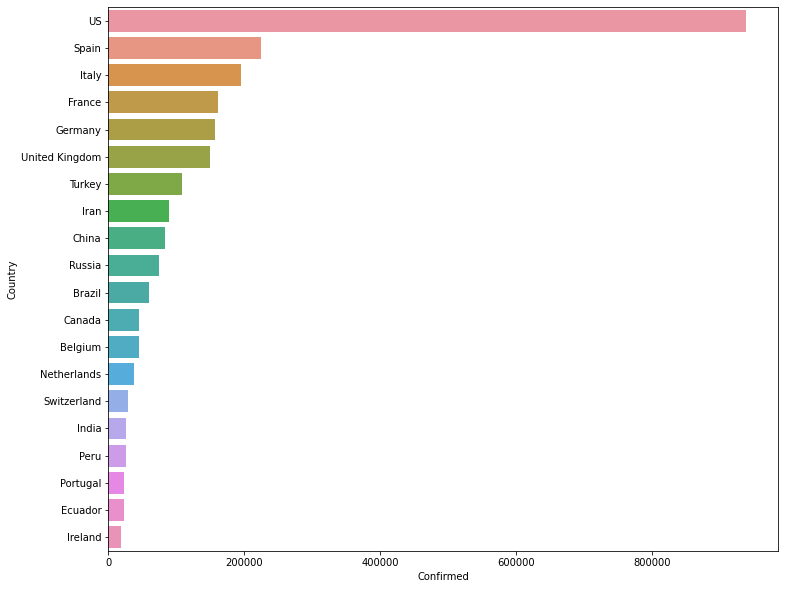

In [0]:
plt.figure(figsize=(12,10))
sns.barplot(top_20['Confirmed'],top_20['Country'])
plt.show()

In [0]:
### making dataframes for different countries

In [0]:
china = df[df['Country']=='China']
china = china.groupby('Date')['Recovered','Active','Confirmed','Deaths'].sum().reset_index()
china.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active,Confirmed,Deaths
0,2020-01-22,28,503,548,17
1,2020-01-23,30,595,643,18
2,2020-01-24,35,859,920,26
3,2020-01-25,38,1326,1406,42
4,2020-01-26,48,1971,2075,56


In [0]:
india = df[df['Country']=='India']
india = india.groupby('Date')['Recovered','Active','Confirmed','Deaths'].sum().reset_index()
india.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active,Confirmed,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [0]:
italy = df[df['Country']=='Italy']
italy = italy.groupby('Date')['Recovered','Active','Confirmed','Deaths'].sum().reset_index()
italy.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active,Confirmed,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [0]:
us = df[df['Country']=='US']
us = us.groupby('Date')['Recovered','Active','Confirmed','Deaths'].sum().reset_index()
us.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Recovered,Active,Confirmed,Deaths
0,2020-01-22,0,1,1,0
1,2020-01-23,0,1,1,0
2,2020-01-24,0,2,2,0
3,2020-01-25,0,2,2,0
4,2020-01-26,0,5,5,0


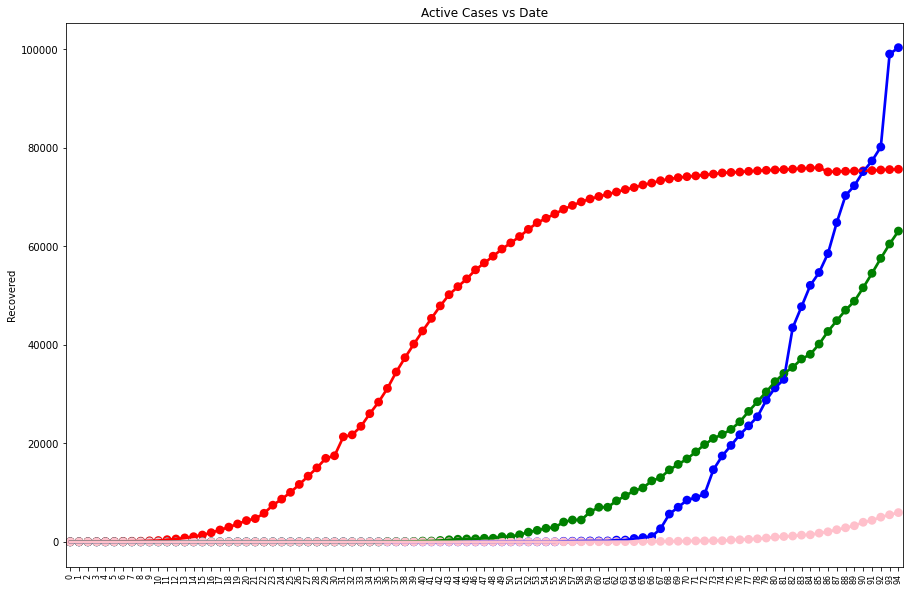

In [0]:
plt.figure(figsize=(15,10))
plt.title("Active Cases vs Date")
plt.xticks(rotation=90,fontsize=8)
sns.pointplot(china.index,china['Recovered'],color='red')
sns.pointplot(us.index,us['Recovered'],color='blue')
sns.pointplot(italy.index,italy['Recovered'],color='green')
sns.pointplot(india.index,india['Recovered'],color='pink')

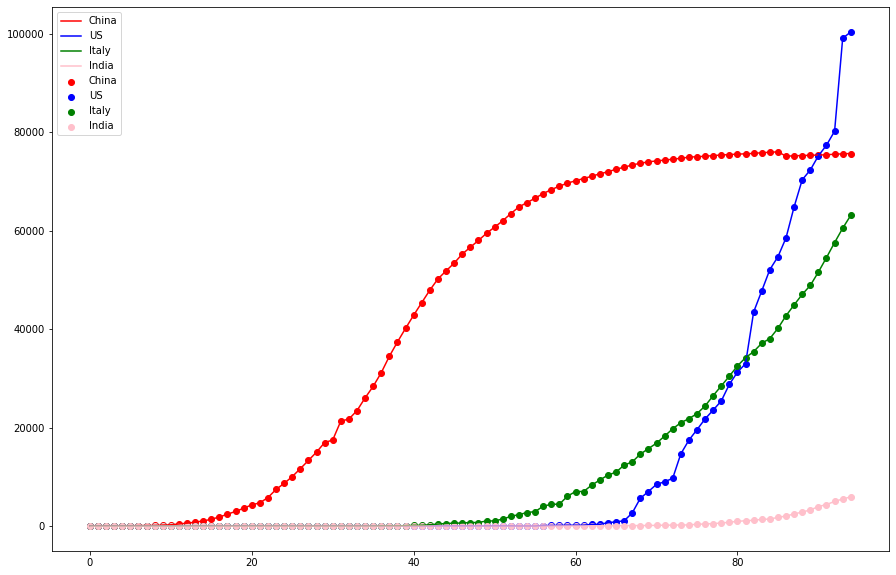

In [0]:
plt.figure(figsize=(15,10))
plt.plot(china.index,china['Recovered'],color='red',label="China")
plt.plot(us.index,us['Recovered'],color='blue',label='US')
plt.plot(italy.index,italy['Recovered'],color='green',label='Italy')
plt.plot(india.index,india['Recovered'],color='pink',label='India')
plt.scatter(china.index,china['Recovered'],color='red',label="China")
plt.scatter(us.index,us['Recovered'],color='blue',label='US')
plt.scatter(italy.index,italy['Recovered'],color='green',label='Italy')
plt.scatter(india.index,india['Recovered'],color='pink',label='India')
plt.legend(loc=2)
plt.show()

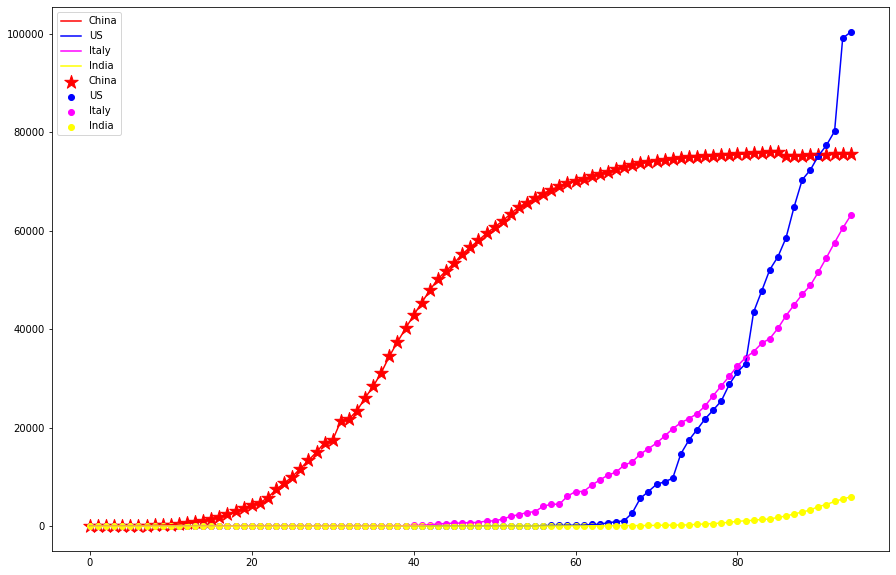

In [0]:
plt.figure(figsize=(15,10))
plt.plot(china.index,china['Recovered'],color='red',label="China")
plt.plot(us.index,us['Recovered'],color='blue',label='US')
plt.plot(italy.index,italy['Recovered'],color='magenta',label='Italy')
plt.plot(india.index,india['Recovered'],color='yellow',label='India')
plt.scatter(china.index,china['Recovered'],color='red',label="China", marker='*',s=200)
plt.scatter(us.index,us['Recovered'],color='blue',label='US')
plt.scatter(italy.index,italy['Recovered'],color='magenta',label='Italy')
plt.scatter(india.index,india['Recovered'],color='yellow',label='India')
plt.legend(loc=2)# Left Top
plt.show()

In [0]:
df.head().style.background_gradient(cmap='Reds')

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,33.000000,65.000000,2020-01-22 00:00:00,0,0,0,0
1,Albania,41.153300,20.168300,2020-01-22 00:00:00,0,0,0,0
2,Algeria,28.033900,1.659600,2020-01-22 00:00:00,0,0,0,0
3,Andorra,42.506300,1.521800,2020-01-22 00:00:00,0,0,0,0
4,Angola,-11.202700,17.873900,2020-01-22 00:00:00,0,0,0,0


In [0]:
active = df.groupby('Date')['Active'].sum().reset_index()
confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()

In [0]:
active.head().style.background_gradient(cmap='Reds')

,Date,Active
0,2020-01-22 00:00:00,510
1,2020-01-23 00:00:00,606
2,2020-01-24 00:00:00,880
3,2020-01-25 00:00:00,1354
4,2020-01-26 00:00:00,2011


In [0]:
from fbprophet import Prophet
## A library in python created by fb for the time series forecasting
## we need two columns first -date(ds), second-forecast_value(y) (Restircted name ds and y)
## So rename is required

In [0]:
active.rename(columns={'Date':'ds','Active':'y'},inplace=True)
active.head().style.background_gradient(cmap='Reds')

,ds,y
0,2020-01-22 00:00:00,510
1,2020-01-23 00:00:00,606
2,2020-01-24 00:00:00,880
3,2020-01-25 00:00:00,1354
4,2020-01-26 00:00:00,2011


### Building the model

In [0]:
model = Prophet(interval_width=0.95) ## Confidence Level

In [0]:
model.fit(active)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods=7)
future.tail()

,ds
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01
101,2020-05-02


In [0]:
forecast = model.predict(future)

In [0]:
forecast.tail(7).style.background_gradient(cmap='Reds')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
95,2020-04-26 00:00:00,1957529.447970,1949782.095004,1973098.838248,1955454.900262,1959887.299307,3247.958119,3247.958119,3247.958119,3247.958119,3247.958119,3247.958119,0.000000,0.000000,0.000000,1960777.406089
96,2020-04-27 00:00:00,2006108.769792,1994794.506445,2020956.158789,1998502.583969,2014368.928153,1250.578566,1250.578566,1250.578566,1250.578566,1250.578566,1250.578566,0.000000,0.000000,0.000000,2007359.348358
97,2020-04-28 00:00:00,2054688.091614,2036414.083058,2072843.634227,2041539.092330,2070569.535810,-1395.537903,-1395.537903,-1395.537903,-1395.537903,-1395.537903,-1395.537903,0.000000,0.000000,0.000000,2053292.553711
98,2020-04-29 00:00:00,2103267.413436,2077727.838623,2125221.889139,2084541.815348,2127061.288305,-3169.158086,-3169.158086,-3169.158086,-3169.158086,-3169.158086,-3169.158086,0.000000,0.000000,0.000000,2100098.255349
99,2020-04-30 00:00:00,2151846.735258,2121739.522226,2184317.923344,2122558.493433,2183534.417784,-1592.750414,-1592.750414,-1592.750414,-1592.750414,-1592.750414,-1592.750414,0.000000,0.000000,0.000000,2150253.984844
100,2020-05-01 00:00:00,2200426.057080,2163491.172022,2246745.446299,2163825.134667,2242473.645455,697.922483,697.922483,697.922483,697.922483,697.922483,697.922483,0.000000,0.000000,0.000000,2201123.979563
101,2020-05-02 00:00:00,2249005.378902,2202778.429613,2301956.790944,2202629.897403,2301840.957355,960.987236,960.987236,960.987236,960.987236,960.987236,960.987236,0.000000,0.000000,0.000000,2249966.366138


In [0]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7).style.background_gradient(cmap='Reds')

,ds,yhat,yhat_lower,yhat_upper
95,2020-04-26 00:00:00,1960777.406089,1949782.095004,1973098.838248
96,2020-04-27 00:00:00,2007359.348358,1994794.506445,2020956.158789
97,2020-04-28 00:00:00,2053292.553711,2036414.083058,2072843.634227
98,2020-04-29 00:00:00,2100098.255349,2077727.838623,2125221.889139
99,2020-04-30 00:00:00,2150253.984844,2121739.522226,2184317.923344
100,2020-05-01 00:00:00,2201123.979563,2163491.172022,2246745.446299
101,2020-05-02 00:00:00,2249966.366138,2202778.429613,2301956.790944


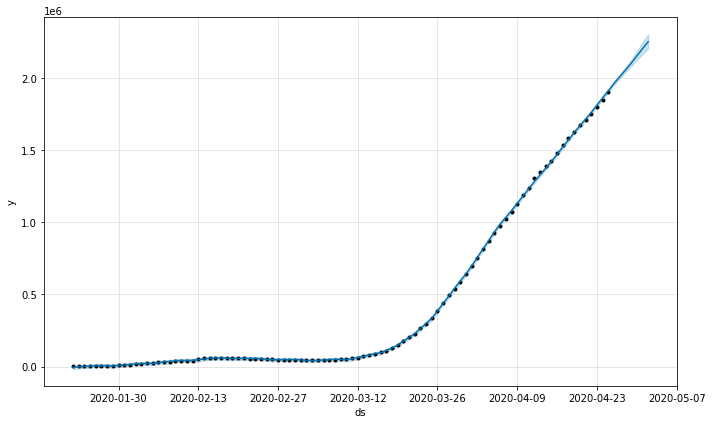

In [0]:
active_plot = model.plot(forecast)

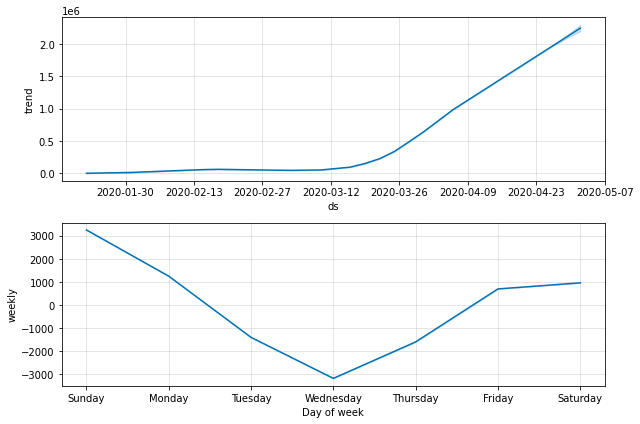

In [0]:
active_plot_weekly = model.plot_components(forecast)

In [0]:
confirmed.head().style.background_gradient(cmap='Reds')
confirmed.rename(columns={'Date':'ds','Confirmed':'y'},inplace=True)
confirmed.head().style.background_gradient(cmap='Reds')


,ds,y
0,2020-01-22 00:00:00,555
1,2020-01-23 00:00:00,654
2,2020-01-24 00:00:00,941
3,2020-01-25 00:00:00,1434
4,2020-01-26 00:00:00,2118


In [0]:
model = Prophet(interval_width=0.95) ## Confidence Level
model.fit(confirmed)
forecast = model.predict(future)
future = model.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01
101,2020-05-02


In [0]:
forecast.tail(7).style.background_gradient(cmap='Reds')
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7).style.background_gradient(cmap='Reds')

,ds,yhat,yhat_lower,yhat_upper
95,2020-04-26 00:00:00,2970003.829891,2961191.226306,2977374.790539
96,2020-04-27 00:00:00,3048598.192367,3037722.083050,3059288.044870
97,2020-04-28 00:00:00,3128318.483149,3106474.536221,3146599.910427
98,2020-04-29 00:00:00,3209814.751592,3180302.627783,3236203.637961
99,2020-04-30 00:00:00,3294670.457956,3257185.435638,3336882.551685
100,2020-05-01 00:00:00,3380859.978700,3333530.038900,3437003.334936
101,2020-05-02 00:00:00,3463293.043907,3402693.095095,3528051.210304


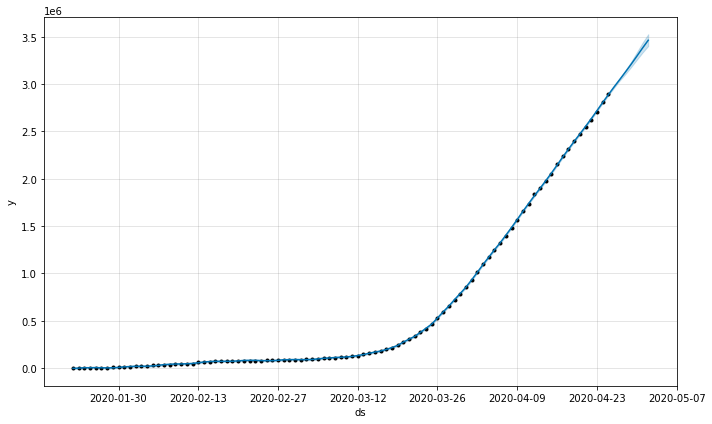

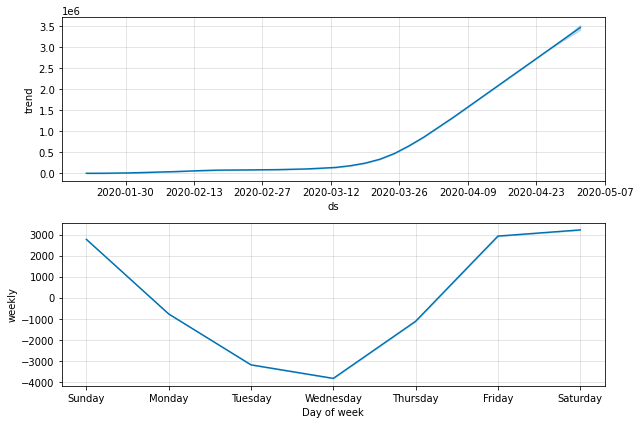

In [0]:
confirmed_plot = model.plot(forecast)
confirmed_plot_weekly = model.plot_components(forecast)

In [0]:
df_india = df[df['Country']=='India']
df_india.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
131,India,21.0,78.0,2020-01-22,0,0,0,0
393,India,21.0,78.0,2020-01-23,0,0,0,0
655,India,21.0,78.0,2020-01-24,0,0,0,0
917,India,21.0,78.0,2020-01-25,0,0,0,0
1179,India,21.0,78.0,2020-01-26,0,0,0,0


In [0]:
active  = df_india.groupby('Date')['Active'].sum().reset_index()
confirmed  = df_india.groupby('Date')['Confirmed'].sum().reset_index()

In [0]:
confirmed.rename(columns={'Date':"ds","Confirmed":"y"},inplace=True)
confirmed.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [0]:
#### Building the Model
model = Prophet(interval_width=0.95)  ## Confidence Level
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods = 7)
future.tail(10)

,ds
92,2020-04-23
93,2020-04-24
94,2020-04-25
95,2020-04-26
96,2020-04-27
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01
101,2020-05-02


In [0]:
forecast = model.predict(future)

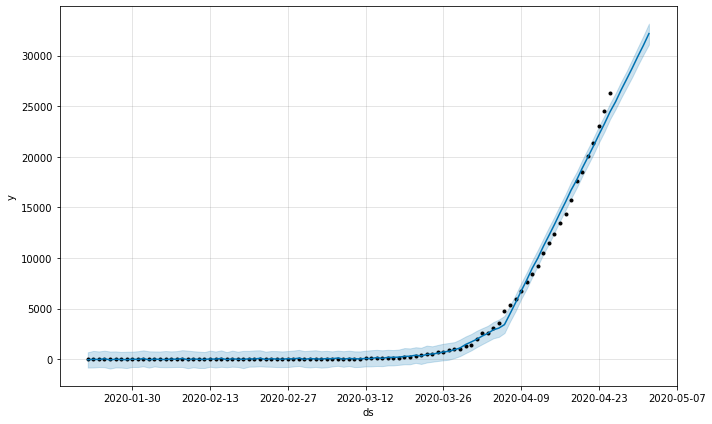

In [0]:
india_plot = model.plot(forecast)

In [0]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7).style.background_gradient(cmap='Reds')
#yhat - predicted/forecasted value
#yhat_lower = lower value of prediction
#yhat_upper = upper value of prediction 

,ds,yhat,yhat_lower,yhat_upper
95,2020-04-26 00:00:00,25446.780999,24706.449826,26278.409381
96,2020-04-27 00:00:00,26613.354529,25822.422778,27426.857372
97,2020-04-28 00:00:00,27687.471229,26855.601213,28463.469904
98,2020-04-29 00:00:00,28779.195152,27891.141524,29622.724722
99,2020-04-30 00:00:00,29924.199700,29023.549198,30797.739989
100,2020-05-01 00:00:00,31012.122392,30094.757595,31947.287100
101,2020-05-02 00:00:00,32183.771867,31101.974518,33167.290497


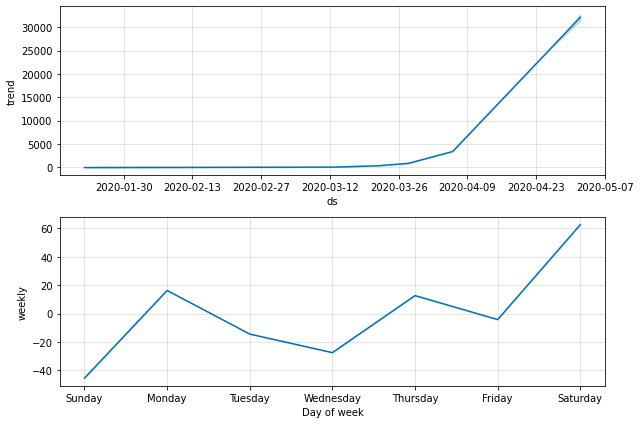

In [0]:
confirmed_plot_weekly_india = model.plot_components(forecast)